<a href="https://colab.research.google.com/github/Arjun-RY/Exercise-Performace-Grading/blob/main/Body_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

le=LabelEncoder()
oh=OneHotEncoder()

In [2]:
df = pd.read_csv('bodyPerformance.csv', index_col=False)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df.shape

(13393, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [6]:
df.loc[df['sit and bend forward_cm']>40,'sit and bend forward_cm'] = 42

In [7]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.185823,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.157702,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,42.000000,80.000000,303.000000


In [8]:
df[(df==0.0).any(axis=1)]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
11,57.0,F,153.0,49.0,20.9,69.0,106.0,21.5,30.0,0.0,90.0,D
136,61.0,F,153.2,62.2,37.0,71.0,111.0,25.7,3.0,0.0,58.0,D
189,56.0,F,148.2,54.7,37.7,85.0,125.0,22.7,10.7,0.0,134.0,D
405,57.0,F,159.2,68.6,32.1,91.0,154.0,30.2,20.6,0.0,133.0,D
484,22.0,F,167.4,66.2,34.0,62.0,110.0,28.5,11.2,38.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
12631,52.0,F,157.6,53.9,32.9,78.0,120.0,16.9,3.3,0.0,118.0,D
12678,60.0,F,161.2,56.8,25.5,75.0,147.0,22.5,13.6,0.0,106.0,D
12725,63.0,F,154.0,47.0,31.8,95.0,145.0,21.5,-4.0,0.0,70.0,D
13359,30.0,M,171.8,82.9,34.2,79.0,131.0,45.5,0.0,33.0,194.0,D


In [9]:
df1=df[(df!=0.0).all(axis=1)]
df1

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13387,39.0,M,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,B
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A


In [10]:
df1.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000
mean,36.609752,168.663081,67.489008,23.115166,78.814772,130.247200,37.108160,15.234165,40.151193,191.058356
std,13.540331,8.371944,11.930565,7.150566,10.717800,14.655241,10.550233,8.130551,13.810217,38.744194
min,21.000000,125.000000,31.900000,3.000000,6.000000,14.000000,1.600000,-25.000000,1.000000,20.000000
25%,25.000000,162.600000,58.200000,18.000000,71.000000,120.000000,27.700000,10.975000,31.000000,163.000000
50%,32.000000,169.300000,67.500000,22.700000,79.000000,130.000000,38.000000,16.200000,42.000000,194.000000
75%,48.000000,174.800000,75.400000,27.800000,86.000000,141.000000,45.200000,20.800000,51.000000,222.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,42.000000,80.000000,303.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


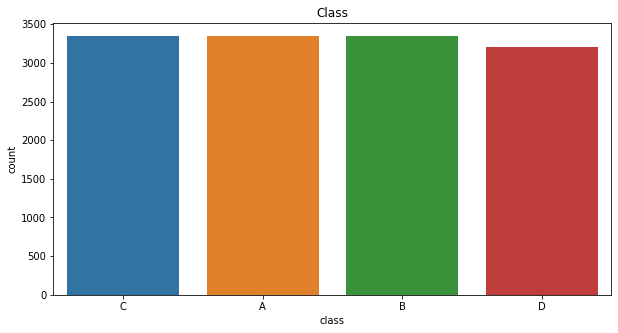

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Class')
sns.countplot(df1['class'])

In [12]:
df1['class'].value_counts()

A    3348
B    3346
C    3344
D    3210
Name: class, dtype: int64

In [13]:
df1['gender'].value_counts()

M    8448
F    4800
Name: gender, dtype: int64

In [14]:
df1=df1.reset_index()

In [15]:

df1['class']=le.fit_transform(df1['class'])
df1=pd.get_dummies(df1,columns=['gender'])

In [16]:
df1

,index,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0,1
1,1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0,1
3,3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0,1
4,4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,13387,39.0,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,1,0,1
13244,13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,0,1
13245,13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3,0,1
13246,13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0,0,1


In [17]:
df1=df1.drop(columns='index')

In [18]:
df1

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,39.0,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,1,0,1
13244,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,0,1
13245,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3,0,1
13246,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0,0,1


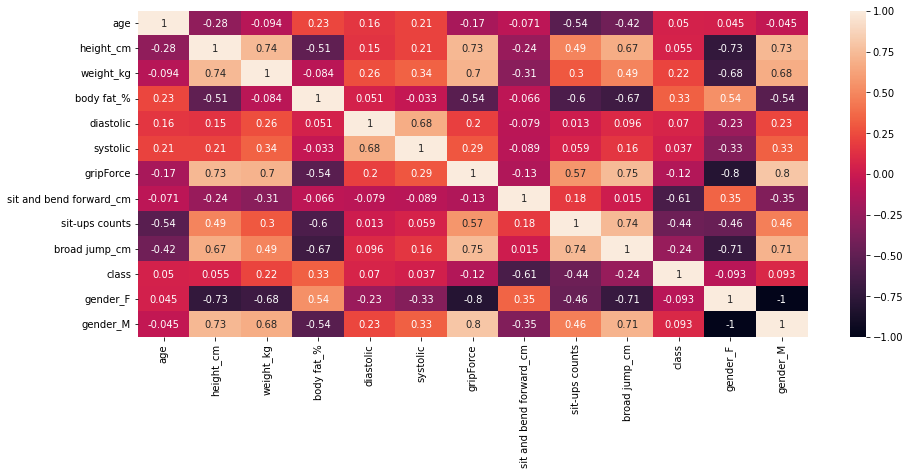

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),annot=True)

In [20]:
X=df1.drop(['class'],axis=1)
y=df1['class']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [22]:
scaler.fit(X_test)

MinMaxScaler()

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict,cross_validate

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'Naive Bayes Multinomial': MultinomialNB(),
    #'Gaussian': GaussianProcessClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Bagging': BaggingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Perform cross-validation and compute performance metrics
kf = KFold(n_splits=5)
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    y_pred = cross_val_predict(clf, X_test,y_test, cv=kf)
    accuracy = scores.mean()
    cm = confusion_matrix(y_test, y_pred)
    cv_results=cross_validate(clf,X_test,y_test,cv=5,scoring=['roc_auc_ovr'],return_estimator=True)
    auc_roc=np.mean(cv_results['test_roc_auc_ovr'])
    
    print(f'{name} accuracy: {accuracy:.2f} AUC-ROC: {auc_roc:.2f} Confusion matrix: \n{cm}')

Logistic Regression accuracy: 0.60 AUC-ROC: 0.84 Confusion matrix: 
[[437 170  22   0]
 [167 271 221  21]
 [ 64 143 370 127]
 [ 13  36 106 482]]
Decision Tree accuracy: 0.63 AUC-ROC: 0.72 Confusion matrix: 
[[388 164  63  14]
 [144 329 156  51]
 [ 67 173 360 104]
 [ 16  65 107 449]]
Random Forest accuracy: 0.73 AUC-ROC: 0.88 Confusion matrix: 
[[483 129  13   4]
 [160 356 139  25]
 [ 63 137 453  51]
 [ 10  33  96 498]]
Gradient Boosting accuracy: 0.71 AUC-ROC: 0.88 Confusion matrix: 
[[488 119  17   5]
 [163 358 141  18]
 [ 63 162 428  51]
 [ 12  51  92 482]]
XGBoost accuracy: 0.69 AUC-ROC: 0.87 Confusion matrix: 
[[509 106  12   2]
 [194 351 119  16]
 [ 77 172 406  49]
 [ 19  56  86 476]]
Bagging accuracy: 0.71 AUC-ROC: 0.84 Confusion matrix: 
[[473 128  25   3]
 [178 346 132  24]
 [ 73 179 401  51]
 [ 18  56 114 449]]
KNN accuracy: 0.55 AUC-ROC: 0.76 Confusion matrix: 
[[457 153  17   2]
 [250 297 118  15]
 [116 260 292  36]
 [ 29 107 170 331]]
